In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
import sklearn 

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#pip install tensorflow

In [3]:
#reading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Dropping customerID column as it is not relevent to our model
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#except SeniorCitizen, tenure, monthly charges all variables are objects we have to change them as well

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
#finding null values in total charges.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#Only 11 instances have null TotalCharges values, it won't effect the modelling so we will just drop them and take 
#the data into new dataset
data = df[df.TotalCharges!=" "]
data.shape

(7032, 20)

In [10]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)
data.TotalCharges.dtypes

dtype('float64')

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Let's create a quick function to inspect the unique values in each categorical column before we take them to ENCODING preprocessing

In [12]:
def print_cat_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [13]:
print_cat_unique(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


##### Hmmm, what does "No internet service" or "No phone service" mean? I believe it means NO !!! Here we should just replace them with NO

In [14]:
data.replace('No phone service', 'No', inplace=True)
data.replace('No internet service', 'No', inplace=True)

In [15]:
encoding_Cat_cols = ['Partner','Dependents','PhoneService',
                    'MultipleLines','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport',
                    'StreamingTV','StreamingMovies',
                    'PaperlessBilling','Churn']

for col in encoding_Cat_cols:
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)

print_cat_unique(data) 

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
data['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
print_cat_unique(data)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### Now we are left with the last three features; InternetService,Contract,PaymentMethod, we can do the same as before, but let's try pd.get_dummies method in order to create more features in the dataset. This will help in the Neural Networks to create more neurons

In [17]:
dummies_encoding = ['InternetService','Contract','PaymentMethod']

data = pd.get_dummies(data=data, columns=dummies_encoding)

In [18]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### As all columns now are numeric ones in 0s and 1s, these three columns are not in the same SCALE.we are using standard scalar to normalise the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

data[cols_scale] = scaler.fit_transform(data[cols_scale])

In [20]:
X = data.drop('Churn', axis=1)
y = data['Churn'].copy()

print(X.shape)
print(y.shape)

(7032, 26)
(7032,)


### EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

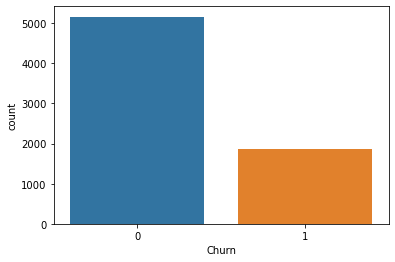

In [21]:
#count how many people churn (leave business)
sns.countplot('Churn',data=data)
#Data contains more data towards no churn than churn

<AxesSubplot:xlabel='tenure', ylabel='Count'>

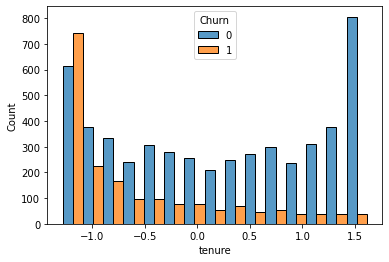

In [22]:
# We can see an imbalance in tenure, it varies in every stage , there is no pattern
sns.histplot(x='tenure',data=data,multiple="dodge",hue='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

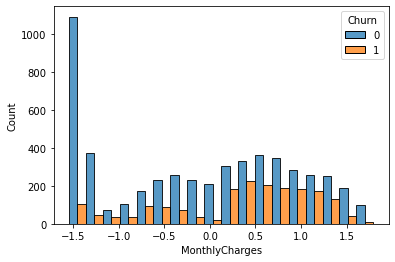

In [23]:
# peeople with less monthly charges are not leaving
sns.histplot(x='MonthlyCharges',data=data,multiple="dodge",hue='Churn')

<AxesSubplot:>

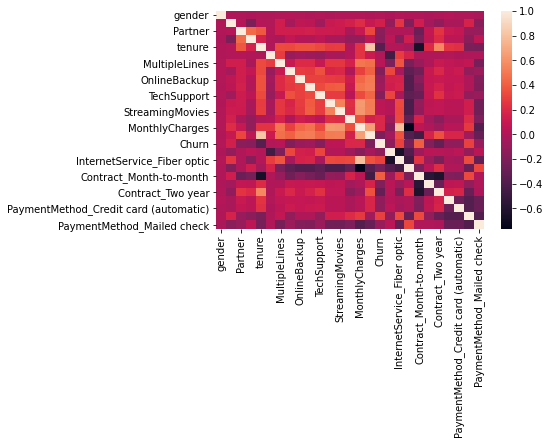

In [24]:
corr=data.corr()
sns.heatmap(corr)

#### EDA was the main reason for me to understanding about the imbalance of this dataset. Here I'm going to use imblearn.over_sampling SMOTE to introduce more instances in order to have better balance before splitting the data into Training & Testing

In [25]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [27]:
X = data.drop('Churn', axis=1)
y = data['Churn'].copy()

print(X.shape)
print(y.shape)

(7032, 26)
(7032,)


In [28]:
X_os, y_os = oversample.fit_resample(X, y)

In [29]:
print(X.shape, y.shape)
print(X_os.shape, y_os.shape)

(7032, 26) (7032,)
(10326, 26) (10326,)


### As you can see, the number of instances increased from 7032 to 10326. Let's split

In [30]:
from sklearn.model_selection import train_test_split
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(
                            X_os, y_os, test_size=0.2, random_state=42)


In [31]:
print('X_os_train Shape', X_os_train.shape)
print('X_os_test Shape', X_os_test.shape)
print('y_os_train Shape', y_os_train.shape)
print('y_os_test Shape', y_os_test.shape)

X_os_train Shape (8260, 26)
X_os_test Shape (2066, 26)
y_os_train Shape (8260,)
y_os_test Shape (2066,)


### Using Keras Sequential()

In [32]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=X_os_train.shape[1:], activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
            metrics=['accuracy'],
            optimizer=keras.optimizers.SGD(learning_rate=5e-1))

model.fit(X_os_train, y_os_train, epochs=100)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.4776 - accuracy: 0.7696
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.7808
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4470 - accuracy: 0.7869
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.7941
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.7955
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.7996
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8007
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8033
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.8094
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4130 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8450
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8477
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8473
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8524
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8467
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8473
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8493
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8494
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8499
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 

In [33]:
model.evaluate(X_os_test, y_os_test)

65/65 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.8088


[0.4408496022224426, 0.8088092803955078]

In [34]:
yp = model.predict(X_os_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_os_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1037
           1       0.77      0.87      0.82      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(69.0, 0.5, 'Actual')

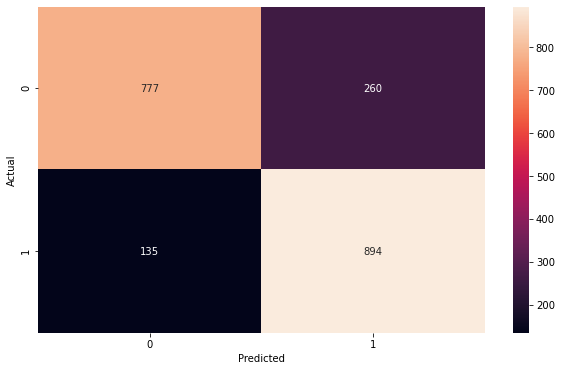

In [36]:
cm = tf.math.confusion_matrix(labels=y_os_test, predictions=y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')